In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

C:\Users\harim\AppData\Local\Temp\ipykernel_21136\2901236228.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [14]:
bitstamp = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
bitstamp['Timestamp'] = [datetime.fromtimestamp(x) for x in bitstamp['Timestamp']]
print(bitstamp.head())
bitstamp.info()

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00   NaN   NaN   NaN    NaN           NaN   
2 2011-12-31 13:24:00   NaN   NaN   NaN    NaN           NaN   
3 2011-12-31 13:25:00   NaN   NaN   NaN    NaN           NaN   
4 2011-12-31 13:26:00   NaN   NaN   NaN    NaN           NaN   

   Volume_(Currency)  Weighted_Price  
0                2.0            4.39  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64    

In [15]:
print('Dataset Shape: ',  bitstamp.shape)

Dataset Shape:  (4857377, 8)


<Axes: title={'center': 'Bitcoin Weighted Price'}, xlabel='Timestamp'>

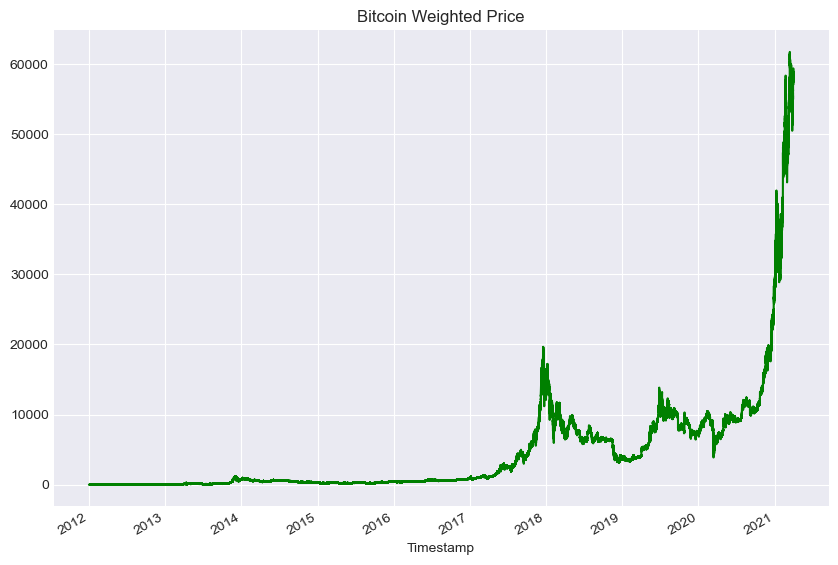

In [16]:
bitstamp.set_index("Timestamp").Weighted_Price.plot(figsize=(10,7), title="Bitcoin Weighted Price", color='green')

Data Preprocessing

In [17]:
missing_values = bitstamp.isnull().sum()
missing_per = (missing_values/bitstamp.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Timestamp,0,0.00000
Open,1243608,25.60246
High,1243608,25.60246
Low,1243608,25.60246
Close,1243608,25.60246
Volume_(BTC),1243608,25.60246
Volume_(Currency),1243608,25.60246
Weighted_Price,1243608,25.60246


In [18]:
def fill_missing(df):
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()
    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()


    print(df.head())
    print("\n")
    print(df.isnull().sum())

In [19]:
fill_missing(bitstamp)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  


Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


Data Visualization

In [20]:
bitstamp_non_indexed = bitstamp.copy()

In [21]:
bitstamp = bitstamp.set_index('Timestamp')
bitstamp.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


In [22]:
bitstamp_daily = bitstamp.resample("24H").mean() 
bitstamp_daily.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.422837,4.426677,4.422837,4.426677,24.024874,105.980529,4.424286
2012-01-01,4.677625,4.677625,4.677625,4.677625,5.883361,27.923145,4.677625
2012-01-02,4.991701,4.991701,4.991701,4.991701,13.503075,67.432386,4.991701
2012-01-03,5.175495,5.175495,5.175495,5.175495,11.136690,56.749845,5.175495
2012-01-04,5.120500,5.133742,5.120500,5.133742,8.327158,43.510443,5.125202


In [23]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [24]:
bitstamp_daily.reset_index(inplace=True)

trace1 = go.Scatter(
    x = bitstamp_daily['Timestamp'],
    y = bitstamp_daily['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = bitstamp_daily['Timestamp'],
    y = bitstamp_daily['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = bitstamp_daily['Timestamp'],
    y = bitstamp_daily['Weighted_Price'].astype(float),
    mode = 'lines',
    name = 'Weighted Avg'
)

layout = dict(
    title='Historical Bitcoin Prices with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(count=60,
                     label='5y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2,trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

Statistical analysis of the data

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
fill_missing(bitstamp_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
1 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
3 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
4 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

   Volume_(Currency)  Weighted_Price  
0         105.980529        4.424286  
1          27.923145        4.677625  
2          67.432386        4.991701  
3          56.749845        5.175495  
4          43.510443        5.125202  


Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


C:\Users\harim\AppData\Local\Temp\ipykernel_21136\3083570777.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



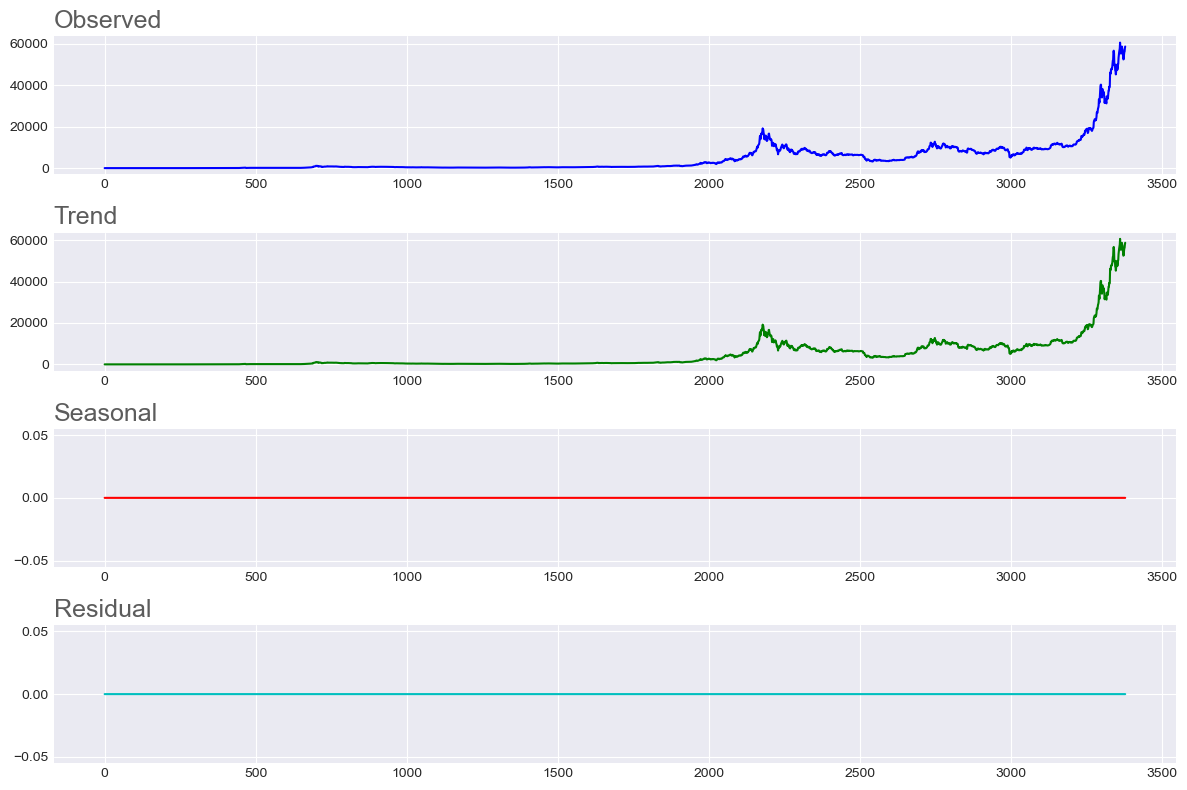

In [27]:
decomposition = sm.tsa.seasonal_decompose(bitstamp_daily.Weighted_Price,period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ax, fig = plt.subplots(figsize=(12,8), sharex=True)

plt.subplot(411)
plt.plot(bitstamp_daily.Weighted_Price, label='Original',color='b')
plt.title("Observed",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(trend, label='Trend',color='g')
plt.title("Trend",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='r')
plt.title("Seasonal",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(residual, label='Residuals',color='c')
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

In [28]:
print("Dicky-Fuller stationarity test: p=%f" % sm.tsa.adfuller(bitstamp_daily["Weighted_Price"])[1])

Dicky-Fuller stationarity test: p=1.000000


Rolling of the data in form of windows to clear white noise

In [29]:
df = bitstamp_daily.set_index("Timestamp")
df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()

C:\Users\harim\AppData\Local\Temp\ipykernel_21136\71695323.py:30: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.422837,4.426677,4.422837,4.426677,24.024874,105.980529,4.424286,4564.752758,4532.014863,...,4342.158190,112.850620,186.071830,417.775512,9.565484,9.572699,9.590264,3.369452,4.136303,5.128796
2012-01-01,2012-01-01,4.677625,4.677625,4.677625,4.677625,5.883361,27.923145,4.677625,4.422837,4.422837,...,4.426677,112.850620,186.071830,417.775512,24.024874,24.024874,24.024874,3.369452,4.136303,5.128796
2012-01-02,2012-01-02,4.991701,4.991701,4.991701,4.991701,13.503075,67.432386,4.991701,4.550231,4.550231,...,4.552151,0.177447,0.177447,0.177447,14.954117,14.954117,14.954117,12.827987,12.827987,12.827987
2012-01-03,2012-01-03,5.175495,5.175495,5.175495,5.175495,11.136690,56.749845,5.175495,4.697388,4.697388,...,4.698668,0.283099,0.283099,0.283099,14.470437,14.470437,14.470437,9.109362,9.109362,9.109362
2012-01-04,2012-01-04,5.120500,5.133742,5.120500,5.133742,8.327158,43.510443,5.125202,4.948274,4.816915,...,4.817875,0.251760,0.332071,0.332071,10.174375,13.637000,13.637000,3.899942,7.622256,7.622256


In [30]:
df["month"] = df.Timestamp.dt.month
df["day"] = df.Timestamp.dt.day
df["week_in_month"]=(df.Timestamp.dt.day/7)+1
df["day_of_week"] = df.Timestamp.dt.dayofweek+1
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,day,week_in_month,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.422837,4.426677,4.422837,4.426677,24.024874,105.980529,4.424286,4564.752758,4532.014863,...,9.565484,9.572699,9.590264,3.369452,4.136303,5.128796,12,31,5.428571,6
2012-01-01,2012-01-01,4.677625,4.677625,4.677625,4.677625,5.883361,27.923145,4.677625,4.422837,4.422837,...,24.024874,24.024874,24.024874,3.369452,4.136303,5.128796,1,1,1.142857,7
2012-01-02,2012-01-02,4.991701,4.991701,4.991701,4.991701,13.503075,67.432386,4.991701,4.550231,4.550231,...,14.954117,14.954117,14.954117,12.827987,12.827987,12.827987,1,2,1.285714,1
2012-01-03,2012-01-03,5.175495,5.175495,5.175495,5.175495,11.136690,56.749845,5.175495,4.697388,4.697388,...,14.470437,14.470437,14.470437,9.109362,9.109362,9.109362,1,3,1.428571,2
2012-01-04,2012-01-04,5.120500,5.133742,5.120500,5.133742,8.327158,43.510443,5.125202,4.948274,4.816915,...,10.174375,13.637000,13.637000,3.899942,7.622256,7.622256,1,4,1.571429,3


In [31]:
df.shape

(3379, 42)

Dividing to testing and training

In [32]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2923, 42)
validation shape : (456, 42)


ARIMA Model

In [33]:
import pmdarima as pm

In [34]:
exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
       'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
       'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 'month',
       'day','week_in_month', 'day_of_week']

In [35]:
model = pm.auto_arima(df_train.Weighted_Price, exogenous=df_train[exogenous_features], trace=True,
                      error_action="ignore", suppress_warnings=True)
model.fit(df_train.Weighted_Price, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38726.548, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38854.989, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38739.796, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38737.063, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38853.501, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38728.327, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38740.389, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=38718.010, Time=2.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=38742.364, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=38732.559, Time=0.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=38727.474, Time=2.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=38725.334, Time=1.86 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=38729.099, Time=0.76 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=38728.781, Time=1.48 sec
 ARIMA(3,1,2)(0,0,0

C:\Users\harim\AppData\Local\Temp\ipykernel_21136\650060596.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2923
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -19352.107
Date:                Sat, 19 Aug 2023   AIC                          38716.214
Time:                        21:55:57   BIC                          38752.095
Sample:                    12-31-2011   HQIC                         38729.138
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0377      0.011    -91.511      0.000      -1.060      -1.016
ar.L2         -0.7219      0.010    -69.588      0.000      -0.742      -0.702
ar.L3          0.1598      0.006     25.520      0.000       0.148       0.172
ma.L1          1.2483      0.009    145.943      0.000       1.232       1.265
ma.L2          0.9535      0.009    108.323      0.000       0.936       0.971
sigma2      3.346e+04    212.370    157.533      0.000     3.3e+04    3.39e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            136985.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             283.72   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Timestamp'>

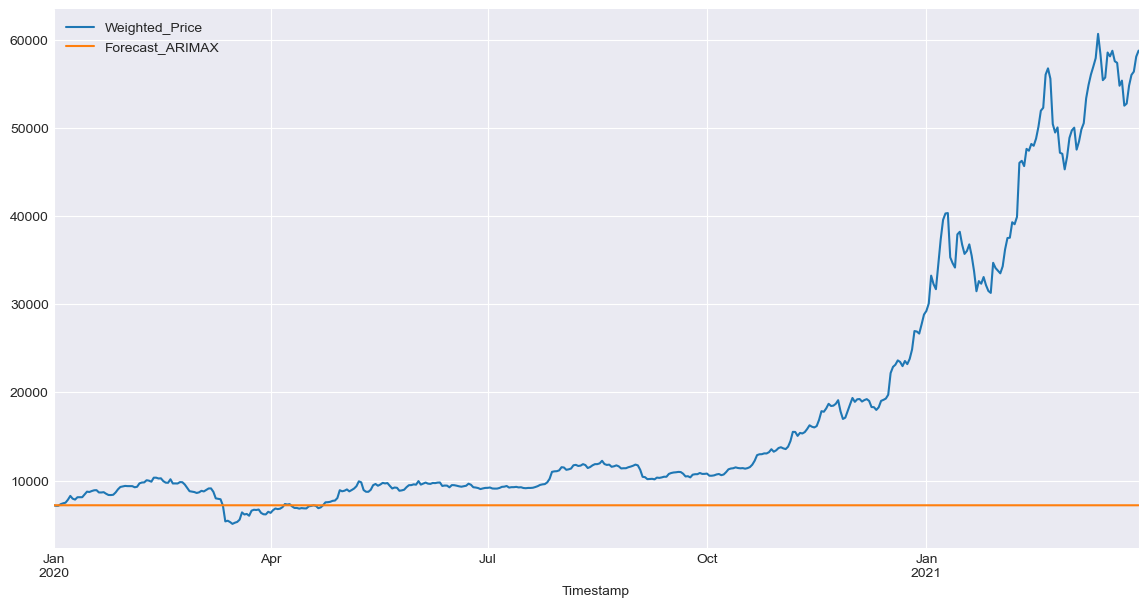

In [37]:
df_valid.plot(x="Timestamp",y=["Weighted_Price","Forecast_ARIMAX"],kind="line",figsize=(14,7))

In [38]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error

In [39]:
print("RMSE error in ARIMA Model:",np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX'])))
print("MAE error in ARIMA Model:",np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX'])))

RMSE error in ARIMA Model: 18052.53281841378
MAE error in ARIMA Model: 18052.53281841378


LSTM(Longest short term memory) Model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [43]:
price_series = bitstamp_daily.reset_index().Weighted_Price.values
price_series

array([4.42428590e+00, 4.67762540e+00, 4.99170099e+00, ...,
       5.63769377e+04, 5.80754168e+04, 5.87588914e+04])

In [44]:
price_series.shape

(3379,)

In [45]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [46]:
price_series_scaled, price_series_scaled.shape

(array([[1.60335970e-06],
        [5.78017102e-06],
        [1.09583390e-05],
        ...,
        [9.29415896e-01],
        [9.57418741e-01],
        [9.68687194e-01]]),
 (3379, 1))

In [47]:
train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

In [49]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [50]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2822, 100), (2822,), (355, 100), (355,))

In [53]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(2822, 100, 1)
(355, 100, 1)


In [55]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True,))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [56]:
# Fitting the LSTM to the Training set
history = regressor.fit(X_train, y_train, validation_split=0.2, epochs = 100, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/100
71/71 [==============================] - 17s 133ms/step - loss: 6.5262e-04 - val_loss: 0.0016
Epoch 2/100
71/71 [==============================] - 8s 112ms/step - loss: 0.0017 - val_loss: 0.0059
Epoch 3/100
71/71 [==============================] - 8s 113ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 4/100
71/71 [==============================] - 8s 109ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 5/100
71/71 [==============================] - 8s 107ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 6/100
71/71 [==============================] - 8s 119ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 7/100
71/71 [==============================] - 8s 108ms/step - loss: 0.0032 - val_loss: 0.0049
Epoch 8/100
71/71 [==============================] - 9s 123ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 9/100
71/71 [==============================] - 9s 130ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 10/100
71/71 [==============================] - 9s 130ms/step - loss: 0.0016 - v

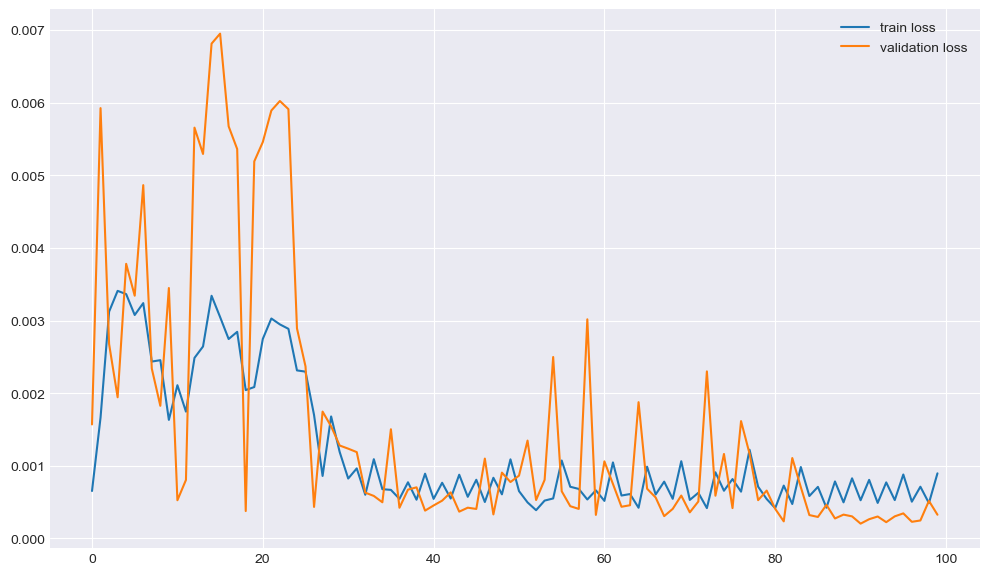

In [57]:
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [58]:
#prediction
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

12/12 [==============================] - 1s 42ms/step


In [59]:
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

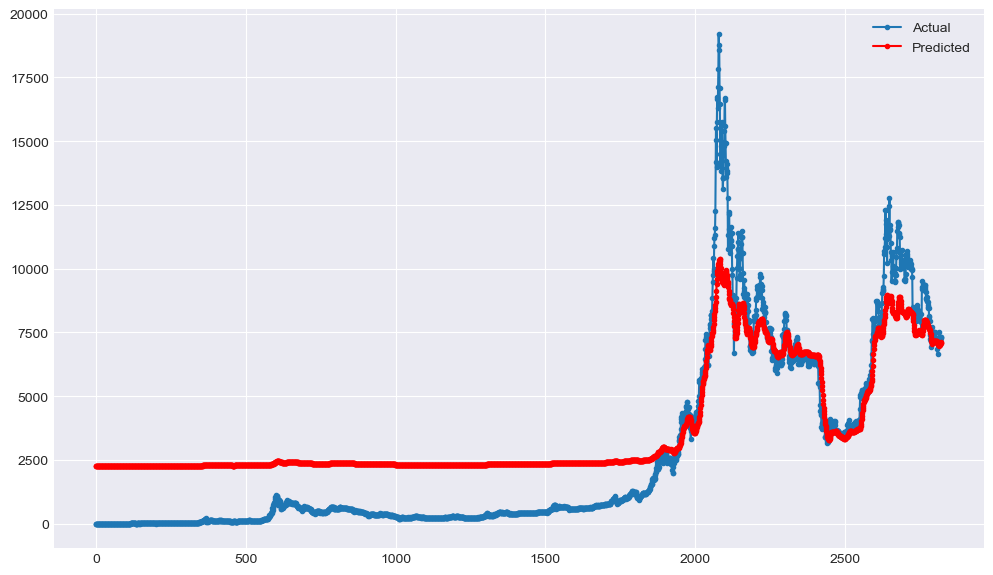

In [60]:
#Prediction on Training data
plt.figure(figsize=(12,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Actual")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

In [62]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
LSTM_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
LSTM_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {LSTM_RMSE}")
print(f"Test MAE: {LSTM_MAE}")

Train RMSE: 0.030492631419335375
Train MAE: 0.16342676759579938
Test RMSE: 0.30313538389003536
Test MAE: 0.4312798112150515
